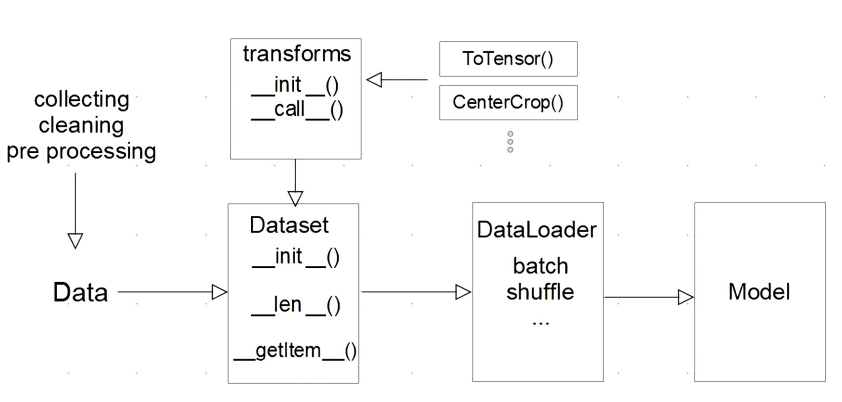

## Dataset 클래스
- 데이터의 입력 형태 정의
- 데이터 입력 방식의 표준화
- 이미지, text, 오디오에 따른 다른 입력 정의


### Dataset 클래스 생성시 유의점
- 데이터의 형태에 따라 함수를 다르게 정의
- 모든 것을 데이터 생성 시점에 처리할 필요 없음
- 

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    #초기 데이터 생성 방법 지정
    def __init__(self, text, labels):
            self.labels = labels
            self.data = text
    
    # 데이터의 전체 길이
    def __len__(self):
            return len(self.labels)

    # index 값을 주었을 때 반환되는 데이터의 형태 {text,label}
    def __getitem__(self, idx):
            label = self.labels[idx]
            text = self.data[idx]
            sample = {"Text": text, "Class": label}
            return sample

In [3]:
# 긍정 부정 매핑
text = ['Happy', 'Amazing', 'Sad', 'Unhapy', 'Glum']
labels = ['Positive', 'Positive', 'Negative', 'Negative', 'Negative']
MyDataset = CustomDataset(text, labels)

In [4]:
type(MyDataset)

__main__.CustomDataset

In [ ]:
MyDataLoader = DataLoader(MyDataset, batch_size=2, shuffle=True)
next(iter(MyDataLoader))

In [ ]:
MyDataLoader = DataLoader(MyDataset, batch_size=3, shuffle=True)
for dataset in MyDataLoader:
    print(dataset)

## Custom Dataset

In [ ]:
from torchvision.datasets import VisionDataset
from typing import Any, Callable, Dict, List, Optional, Tuple
import os

from tqdm import tqdm
import os
import sys
from pathlib import Path
import requests

from skimage import io, transform
import matplotlib.pyplot as plt


In [ ]:

import tarfile

    
class NotMNIST(VisionDataset):
    resource_url = 'http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz'
    
    def __init__(
            self,
            root: str,
            train: bool = True,
            transform: Optional[Callable] = None,
            target_transform: Optional[Callable] = None,
            download: bool = False,
    ) -> None:
        super(NotMNIST, self).__init__(root, transform=transform,
                                    target_transform=target_transform)

        if not self._check_exists() or download:
            self.download()
            
        self.data, self.targets = self._load_data()
        

    def __len__(self):
        return len(self.data)

    
    def __getitem__(self, index):
        image_name = self.data[index]
        image = io.imread(image_name)
        label = self.targets[index]
        if self.transform:
            image = self.transform(image) 
        return image, label

    def _load_data(self):
        filepath = self.image_folder
        data = []
        targets = []
        
        for target in os.listdir(filepath):
            filenames = [os.path.abspath(
                os.path.join(filepath, target, x)) for x in os.listdir(
                os.path.join(filepath, target))]
            
            targets.extend([target] * len(filenames))
            data.extend(filenames)
        return data, targets 

    @property
    def raw_folder(self) -> str:
        return os.path.join(self.root, self.__class__.__name__, 'raw')

    @property
    def image_folder(self) -> str:
        return os.path.join(self.root, 'notMNIST_large')


    def download(self) -> None:
        os.makedirs(self.raw_folder, exist_ok=True)
        fname = self.resource_url.split("/")[-1]
        chunk_size = 1024

        user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36' ##
        
        filesize = int(requests.head(
            self.resource_url, 
            headers={
            "User-Agent" : user_agent 
        }).headers["Content-Length"])
        
        with requests.get(self.resource_url, stream=True, headers={
            "User-Agent" : user_agent 
        }) as r, open(
            os.path.join(self.raw_folder, fname), "wb") as f, tqdm(
            unit="B",  # unit string to be displayed.
            unit_scale=True,  # let tqdm to determine the scale in kilo, mega..etc.
            unit_divisor=1024,  # is used when unit_scale is true
            total=filesize,  # the total iteration.
            file=sys.stdout,  # default goes to stderr, this is the display on console.
            desc=fname  # prefix to be displayed on progress bar.
        ) as progress:
            for chunk in r.iter_content(chunk_size=chunk_size):
                # download the file chunk by chunk
                datasize = f.write(chunk)
                # on each chunk update the progress bar.
                progress.update(datasize)
        
        self._extract_file(os.path.join(self.raw_folder, fname), target_path=self.root)
        
    def _extract_file(self, fname, target_path) -> None:
        if fname.endswith("tar.gz"):
            tag = "r:gz"
        elif fname.endswith("tar"):
            tag = "r:"
        tar = tarfile.open(fname, tag)
        tar.extractall(path=target_path)
        tar.close()
    
    def _check_exists(self) -> bool:
        return os.path.exists(self.raw_folder)
        

In [ ]:
dataset = NotMNIST("data", download=True)

In [ ]:
fig = plt.figure()

for i in range(8):
    sample = dataset[i]

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample[0])

    if i == 3:
        plt.show()
        break

In [ ]:
import torch
from torchvision import transforms, datasets

data_transform = transforms.Compose([
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

dataset = NotMNIST("data", download=False)



In [ ]:
dataset_loader = torch.utils.data.DataLoader(dataset,
                                             batch_size=128, shuffle=True)

In [ ]:
train_features, train_labels = next(iter(dataset_loader))


In [ ]:
train_features.shape

In [ ]:
train_labels

In [ ]:
train_features.shape